In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tZDgOwvOEk9f4OqNKXOK")
project = rf.workspace("faceneye").project("eye-and-face-detection")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to eye-and-face-detection-4 in yolov8:: 100%|██████████| 4988/4988 [00:00<00:00, 5703.46it/s]


In [2]:
!pip install ultralytics


In [ ]:
from ultralytics import YOLO

# Load a pre-trained model
model = YOLO('yolov8n.pt')

# Define the absolute path to your data.yaml file
yaml_path = '/content/eye-and-face-detection-4/data.yaml'

results = model.train(
    data=yaml_path,
    epochs=100,  
    imgsz=640,   
    batch=16,    
    patience=50, # Stop training if no improvement after 50 epochs
    cache='ram', # Speeds up training by caching images in RAM
    workers=8    
)

Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/eye-and-face-detection-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1265.9±411.9 MB/s, size: 36.0 KB)


train: Scanning /content/eye-and-face-detection-4/train/labels... 2179 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2179/2179 [00:01<00:00, 2122.62it/s]

train: New cache created: /content/eye-and-face-detection-4/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.5GB RAM): 100%|██████████| 2179/2179 [00:06<00:00, 358.53it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 530.9±260.4 MB/s, size: 34.7 KB)


val: Scanning /content/eye-and-face-detection-4/valid/labels... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<00:00, 863.82it/s]

val: New cache created: /content/eye-and-face-detection-4/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.2GB RAM): 100%|██████████| 206/206 [00:00<00:00, 232.78it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.17G     0.7802      1.153      1.057         12        640: 100%|██████████| 137/137 [00:40<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        206        670      0.993      0.964      0.992      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.65G     0.6544     0.6008     0.9666          8        640: 100%|██████████| 137/137 [00:35<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]


                   all        206        670       0.97      0.975      0.993      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.67G     0.6551     0.5435     0.9677         18        640: 100%|██████████| 137/137 [00:35<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]

                   all        206        670      0.989      0.976       0.99      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.67G      0.625     0.4693       0.96         15        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]

                   all        206        670      0.977      0.979      0.991      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.7G     0.5923     0.4184      0.944         24        640: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.69it/s]

                   all        206        670      0.988      0.983      0.992      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.72G     0.5696     0.3926     0.9319         20        640: 100%|██████████| 137/137 [00:36<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]

                   all        206        670      0.983      0.983      0.994      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.73G     0.5723     0.3783     0.9351         10        640: 100%|██████████| 137/137 [00:36<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]

                   all        206        670       0.98      0.974      0.993      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.74G     0.5478     0.3634     0.9225         16        640: 100%|██████████| 137/137 [00:35<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        206        670      0.966      0.981       0.99      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.77G      0.532     0.3583     0.9188         14        640: 100%|██████████| 137/137 [00:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]

                   all        206        670      0.981      0.981      0.992      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.78G     0.5263     0.3442     0.9173         24        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.73it/s]

                   all        206        670      0.991      0.975      0.994      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.8G     0.5228     0.3415     0.9168         20        640: 100%|██████████| 137/137 [00:36<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.72it/s]

                   all        206        670      0.988      0.986      0.994      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.81G     0.5187     0.3352     0.9142         11        640: 100%|██████████| 137/137 [00:35<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]

                   all        206        670       0.98      0.991      0.994      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.84G     0.5148     0.3295     0.9167         33        640: 100%|██████████| 137/137 [00:36<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]

                   all        206        670      0.995      0.982      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.86G     0.5076     0.3232     0.9063         20        640: 100%|██████████| 137/137 [00:35<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        206        670      0.997      0.981      0.993       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.87G     0.4986     0.3176     0.9116         20        640: 100%|██████████| 137/137 [00:34<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]


                   all        206        670      0.984      0.975      0.993      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.88G     0.4919     0.3114     0.9037         19        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.74it/s]

                   all        206        670      0.985      0.976      0.992      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.9G     0.4888     0.3092     0.9047          9        640: 100%|██████████| 137/137 [00:35<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]

                   all        206        670      0.983      0.983      0.993      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.92G     0.4811     0.3075     0.9012         31        640: 100%|██████████| 137/137 [00:35<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.53it/s]

                   all        206        670      0.985      0.991      0.992      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.94G     0.4771      0.299     0.8999         24        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        206        670      0.988      0.981      0.993      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.95G     0.4693     0.2945     0.8964         10        640: 100%|██████████| 137/137 [00:34<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.32it/s]

                   all        206        670      0.986      0.986      0.993      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.97G     0.4714     0.2953     0.8993         26        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]

                   all        206        670      0.985      0.982      0.994      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.99G     0.4681     0.2977     0.9002         21        640: 100%|██████████| 137/137 [00:35<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.42it/s]

                   all        206        670      0.989      0.985      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.01G     0.4702     0.2944     0.8979         12        640: 100%|██████████| 137/137 [00:35<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.88it/s]

                   all        206        670      0.981      0.984      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.02G     0.4606     0.2895      0.889         15        640: 100%|██████████| 137/137 [00:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]

                   all        206        670       0.98       0.99      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.04G      0.447     0.2794     0.8902         17        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]

                   all        206        670      0.983      0.985      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.06G     0.4484     0.2802      0.892         28        640: 100%|██████████| 137/137 [00:35<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]

                   all        206        670      0.979       0.99      0.994      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.07G     0.4495     0.2774     0.8846         31        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.62it/s]

                   all        206        670      0.981      0.986      0.993      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.08G     0.4501     0.2802      0.887         13        640: 100%|██████████| 137/137 [00:35<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]

                   all        206        670      0.972      0.976      0.993      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.11G      0.454     0.2786     0.8913         18        640: 100%|██████████| 137/137 [00:35<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all        206        670      0.988      0.986      0.994      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.12G     0.4462     0.2788     0.8891         26        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]


                   all        206        670      0.981      0.992      0.994      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.14G     0.4343     0.2723     0.8885         15        640: 100%|██████████| 137/137 [00:35<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.44it/s]

                   all        206        670      0.989      0.982      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.15G     0.4414      0.271     0.8808         16        640: 100%|██████████| 137/137 [00:36<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.67it/s]

                   all        206        670      0.982      0.991      0.994      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.18G     0.4276     0.2637     0.8855         25        640: 100%|██████████| 137/137 [00:36<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]

                   all        206        670      0.992      0.985      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.2G     0.4313      0.264     0.8861         13        640: 100%|██████████| 137/137 [00:35<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]

                   all        206        670      0.987      0.986      0.994      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.21G     0.4265     0.2627     0.8835         26        640: 100%|██████████| 137/137 [00:34<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        206        670       0.99      0.985      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.22G     0.4286      0.263     0.8838         36        640: 100%|██████████| 137/137 [00:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]

                   all        206        670      0.986      0.988      0.994      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.25G     0.4251     0.2641     0.8851         17        640: 100%|██████████| 137/137 [00:36<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.86it/s]

                   all        206        670      0.991      0.982      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.26G     0.4198     0.2581     0.8801         21        640: 100%|██████████| 137/137 [00:36<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]

                   all        206        670      0.992      0.989      0.994      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.28G     0.4184     0.2589     0.8804         13        640: 100%|██████████| 137/137 [00:35<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]

                   all        206        670      0.992      0.982      0.993      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.29G     0.4188     0.2604     0.8811         11        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        206        670      0.988      0.979      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.32G     0.4125     0.2539     0.8784         13        640: 100%|██████████| 137/137 [00:34<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]

                   all        206        670       0.99       0.99      0.994      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.33G     0.4089     0.2527     0.8778         13        640: 100%|██████████| 137/137 [00:35<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.55it/s]

                   all        206        670      0.982      0.986      0.993      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.35G      0.408     0.2514     0.8749         17        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]

                   all        206        670      0.983      0.988      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.36G     0.4041      0.248     0.8774         11        640: 100%|██████████| 137/137 [00:35<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]

                   all        206        670      0.992      0.982      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.38G     0.4102       0.25     0.8781         11        640: 100%|██████████| 137/137 [00:35<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        206        670      0.987      0.982      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       3.4G     0.4018     0.2459     0.8756          9        640: 100%|██████████| 137/137 [00:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        206        670      0.989       0.98      0.994      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.42G     0.4023     0.2432     0.8718         14        640: 100%|██████████| 137/137 [00:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]

                   all        206        670      0.985      0.982      0.993      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.42G     0.4066      0.243     0.8763         18        640: 100%|██████████| 137/137 [00:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]

                   all        206        670      0.989      0.968      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.45G     0.3962     0.2416     0.8732         11        640: 100%|██████████| 137/137 [00:35<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]

                   all        206        670      0.985       0.98      0.992      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.47G     0.4075     0.2461     0.8748         32        640: 100%|██████████| 137/137 [00:34<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        206        670      0.979       0.98      0.994       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.49G     0.3991       0.24      0.875         16        640: 100%|██████████| 137/137 [00:33<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.51it/s]

                   all        206        670      0.983      0.992      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.5G     0.3952     0.2403     0.8736         16        640: 100%|██████████| 137/137 [00:36<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.83it/s]

                   all        206        670      0.991      0.979      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.52G     0.3831     0.2347     0.8719         15        640: 100%|██████████| 137/137 [00:36<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]

                   all        206        670      0.987      0.986      0.994      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.54G     0.3878     0.2377      0.869         15        640: 100%|██████████| 137/137 [00:35<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.53it/s]

                   all        206        670      0.986      0.981      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.55G     0.3889     0.2358     0.8687         13        640: 100%|██████████| 137/137 [00:34<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]

                   all        206        670      0.984      0.987      0.994      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.56G     0.3878     0.2339     0.8695         17        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]

                   all        206        670      0.986      0.982      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.59G     0.3794     0.2289     0.8649         15        640: 100%|██████████| 137/137 [00:35<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.74it/s]

                   all        206        670      0.993      0.975      0.991      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.6G     0.3839     0.2312     0.8673         28        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.26it/s]

                   all        206        670      0.986      0.982      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.62G     0.3753     0.2282     0.8635         25        640: 100%|██████████| 137/137 [00:35<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]

                   all        206        670      0.985      0.981      0.994      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.63G      0.374     0.2309      0.871         17        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        206        670      0.994      0.977      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.66G     0.3799     0.2299     0.8656         19        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.45it/s]

                   all        206        670      0.991       0.98      0.993       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.67G     0.3702     0.2244     0.8627         24        640: 100%|██████████| 137/137 [00:36<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]

                   all        206        670       0.99      0.979      0.993      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.69G     0.3721     0.2254     0.8614         14        640: 100%|██████████| 137/137 [00:35<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]

                   all        206        670      0.985      0.978      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       3.7G     0.3705     0.2261      0.866          9        640: 100%|██████████| 137/137 [00:35<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]

                   all        206        670      0.989      0.979      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.73G     0.3644     0.2197     0.8604         15        640: 100%|██████████| 137/137 [00:34<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]

                   all        206        670       0.98      0.987      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.74G     0.3572     0.2176     0.8643         15        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]

                   all        206        670      0.991       0.98      0.993      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.76G     0.3612     0.2192     0.8627         19        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.76it/s]

                   all        206        670      0.992      0.979      0.992       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.77G     0.3638     0.2197     0.8632         19        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.50it/s]

                   all        206        670      0.994      0.981      0.994      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.79G     0.3575     0.2156      0.863         20        640: 100%|██████████| 137/137 [00:36<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]

                   all        206        670      0.991      0.984      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.81G     0.3568     0.2155      0.861         25        640: 100%|██████████| 137/137 [00:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        206        670      0.994      0.981      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.83G     0.3569     0.2153     0.8615         13        640: 100%|██████████| 137/137 [00:36<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        206        670      0.984      0.985      0.993      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.84G     0.3475     0.2101     0.8603         26        640: 100%|██████████| 137/137 [00:35<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.63it/s]

                   all        206        670      0.986      0.989      0.994      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.86G     0.3525     0.2131     0.8596         22        640: 100%|██████████| 137/137 [00:35<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.52it/s]

                   all        206        670      0.989      0.976      0.993      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.88G     0.3502     0.2119     0.8613         11        640: 100%|██████████| 137/137 [00:35<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]

                   all        206        670      0.987      0.984      0.994      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.9G     0.3499     0.2106     0.8604         15        640: 100%|██████████| 137/137 [00:35<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]

                   all        206        670      0.979      0.991      0.993      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       3.9G     0.3543     0.2123     0.8584         10        640: 100%|██████████| 137/137 [00:34<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        206        670      0.992      0.982      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.93G     0.3384     0.2055     0.8554         15        640: 100%|██████████| 137/137 [00:34<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.49it/s]

                   all        206        670       0.99      0.979      0.993      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.95G     0.3393     0.2058     0.8564         14        640: 100%|██████████| 137/137 [00:35<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        206        670      0.982       0.99      0.994      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.97G     0.3389     0.2065     0.8544         18        640: 100%|██████████| 137/137 [00:36<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]

                   all        206        670      0.991      0.982      0.993      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.97G     0.3338     0.2011     0.8583         23        640: 100%|██████████| 137/137 [00:36<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]

                   all        206        670      0.989      0.979      0.993      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         4G     0.3377     0.2035     0.8559          8        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]

                   all        206        670      0.987      0.981      0.994      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.01G     0.3332     0.1981     0.8549         20        640: 100%|██████████| 137/137 [00:36<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        206        670      0.985      0.979      0.993      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.04G     0.3321      0.199     0.8565         16        640: 100%|██████████| 137/137 [00:35<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        206        670      0.989      0.978      0.992      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.04G     0.3282     0.1977     0.8558         16        640: 100%|██████████| 137/137 [00:35<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]

                   all        206        670      0.989      0.982      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.06G     0.3333        0.2     0.8527         24        640: 100%|██████████| 137/137 [00:36<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.34it/s]

                   all        206        670       0.99       0.98      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.08G     0.3245     0.1957     0.8521         31        640: 100%|██████████| 137/137 [00:36<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.29it/s]

                   all        206        670      0.988      0.982      0.994      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       4.1G     0.3241     0.1939     0.8554         28        640: 100%|██████████| 137/137 [00:37<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.46it/s]

                   all        206        670      0.987      0.985      0.994      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.11G     0.3232     0.1927      0.853         12        640: 100%|██████████| 137/137 [00:36<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.30it/s]

                   all        206        670      0.985      0.981      0.994      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.13G     0.3199     0.1916     0.8514         11        640: 100%|██████████| 137/137 [00:35<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        206        670      0.992      0.975      0.992      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.15G     0.3189     0.1898     0.8495         25        640: 100%|██████████| 137/137 [00:35<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        206        670       0.99      0.979      0.992      0.937


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.17G     0.3115     0.1754      0.801          9        640: 100%|██████████| 137/137 [00:36<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


                   all        206        670      0.983      0.984      0.993      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.17G     0.3034     0.1706     0.7997          9        640: 100%|██████████| 137/137 [00:34<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.51it/s]

                   all        206        670      0.982      0.986      0.993      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       4.2G      0.295     0.1686     0.7987          9        640: 100%|██████████| 137/137 [00:35<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.53it/s]

                   all        206        670      0.987      0.981      0.992      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.22G     0.2925     0.1649     0.7989          9        640: 100%|██████████| 137/137 [00:35<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]

                   all        206        670      0.983      0.985      0.992      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.24G     0.2881     0.1619     0.7957          9        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        206        670      0.983      0.987      0.993      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.24G     0.2869     0.1616     0.7944          9        640: 100%|██████████| 137/137 [00:33<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.67it/s]

                   all        206        670      0.984      0.985      0.992      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.27G     0.2864     0.1606     0.7948          9        640: 100%|██████████| 137/137 [00:35<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.71it/s]

                   all        206        670      0.983      0.985      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.29G     0.2807     0.1574     0.7936         10        640: 100%|██████████| 137/137 [00:35<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.55it/s]

                   all        206        670      0.983      0.987      0.993      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       4.3G     0.2773     0.1566     0.7941          9        640: 100%|██████████| 137/137 [00:35<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        206        670      0.986      0.981      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.31G     0.2756     0.1553     0.7935          9        640: 100%|██████████| 137/137 [00:34<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.72it/s]

                   all        206        670      0.985      0.981      0.993      0.937



100 epochs completed in 1.045 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


                   all        206        670      0.983      0.985      0.993       0.94
                  Face        206        247      0.972      0.988      0.992      0.973
                  eyes        203        423      0.993      0.983      0.995      0.908
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/train2


In [10]:
from ultralytics import YOLO

# Path to your data.yaml file and the trained model
yaml_path = '/content/eye-and-face-detection-4/data.yaml'
model_path = '/content/runs/detect/train2/weights/best.pt'

# Load the best trained model
model = YOLO(model_path)

In [11]:
# Validate the model on the test set
metrics = model.val(data=yaml_path)

Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1072.3±399.2 MB/s, size: 35.9 KB)


val: Scanning /content/eye-and-face-detection-4/valid/labels.cache... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]


                   all        206        670      0.983      0.985      0.993      0.941
                  Face        206        247      0.972      0.988      0.991      0.973
                  eyes        203        423      0.993      0.983      0.995       0.91
Speed: 2.1ms preprocess, 5.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val


In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import os
from ultralytics import YOLO
from google.colab import drive
import yaml

In [13]:
# Define paths to your data and model
yaml_path = '/content/eye-and-face-detection-4/data.yaml'
model_path = '/content/runs/detect/train2/weights/best.pt'

# Load the trained model
model = YOLO(model_path)

In [ ]:
# Get a list of test images
test_images_path = '/content/eye-and-face-detection-4/test/images'
test_images = os.listdir(test_images_path)
selected_image_name = test_images[5] # Select a image in the list
selected_image_path = os.path.join(test_images_path, selected_image_name)

# Run prediction on a single image and save the result
results = model.predict(source=selected_image_path, save=True, conf=0.5, imgsz=640)

# Get the path to the saved predicted image
predicted_image_path = results[0].save_dir # This will give the path to the 'exp' folder
predicted_image_path = os.path.join(predicted_image_path, selected_image_name)


image 1/1 /content/eye-and-face-detection-4/test/images/face-1238_png.rf.898c67a72c9b9a10c5f82e79d435c569.jpg: 640x640 1 Face, 2 eyess, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


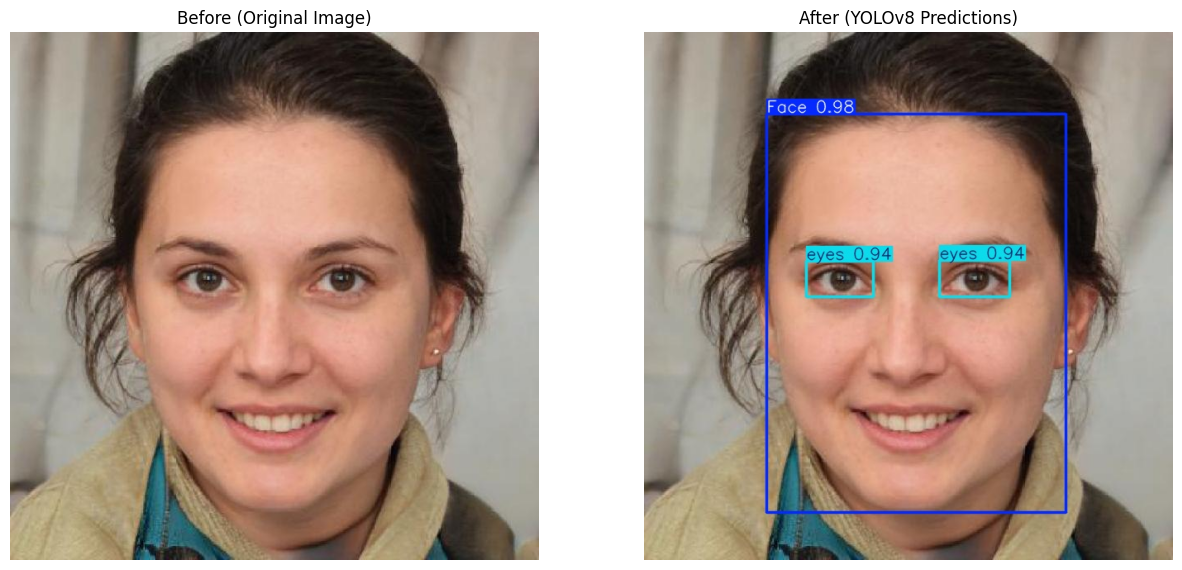

In [17]:
# Load the original image
original_img = Image.open(selected_image_path)

# Load the predicted image
predicted_img = Image.open(predicted_image_path)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Display the original image
axes[0].imshow(original_img)
axes[0].set_title('Before (Original Image)')
axes[0].axis('off')

# Display the predicted image
axes[1].imshow(predicted_img)
axes[1].set_title('After (YOLOv8 Predictions)')
axes[1].axis('off')

plt.show()